### Advanced Prophet Models - Modeling Holiday and Other Date Effects

This program builds on the previous activity, and begins the following:

`prophet_prepare_train_data`, `analyze_model_results` & `detecting_changes`

Reads in the CSV of hourly crypto trading data, conducts exploratory data analysis, and builds a forecast model using the Facebook Prophet package. With the model built, creates forecasts for future crypto prices and splits this forecast into various seasonal patterns.

**This program** continues the analysis of hourly crypto trading data, covering some advanced Prophet strategies for making forecasts, by adjusting for holidays or other special date effects.


# (These first steps are from the previous Activity and have already been completed)

In [4]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import hvplot.pandas
import datetime as dt
%matplotlib inline

### Read in the data to visualize, analyze, and forecast.

In [7]:
# Read csv file as DataFrame, with the first column as row index
data_path = Path("../Resources/bitcoin_hourly.csv")
df = pd.read_csv(data_path, index_col='date', infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop('volume', axis=1)

# Preview the dataset
df

,close
date,
2017-08-17 05:00:00,4315.32
2017-08-17 06:00:00,4324.35
2017-08-17 07:00:00,4349.99
2017-08-17 08:00:00,4360.69
2017-08-17 09:00:00,4444.00
...,...
2021-02-12 01:00:00,48477.50
2021-02-12 02:00:00,47935.66
2021-02-12 03:00:00,47587.31


In [8]:
# Use hvPlot to visually inspect the price data
df['close'].hvplot()

:Curve   [date]   (close)

In [9]:
# Reset the index so that we recode the columns for Prophet
df = df.reset_index()

In [10]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns = ['ds', 'y']

# Drop an NaN values from the prophet_df DataFrame
# mercado_prophet_df = mercado_prophet_df.dropna()

# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(df.shape)
display(df.head())
display(df.tail())

(30748, 2)

,ds,y
0,2017-08-17 05:00:00,4315.32
1,2017-08-17 06:00:00,4324.35
2,2017-08-17 07:00:00,4349.99
3,2017-08-17 08:00:00,4360.69
4,2017-08-17 09:00:00,4444.00


,ds,y
30743,2021-02-12 01:00:00,48477.50
30744,2021-02-12 02:00:00,47935.66
30745,2021-02-12 03:00:00,47587.31
30746,2021-02-12 04:00:00,47271.55
30747,2021-02-12 05:00:00,47398.79


### Fitting the Model

In [11]:
# Call the Prophet function, store as an object
model = Prophet()
model

In [12]:
# Fit the time-series model.
model.fit(df)

Initial log joint probability = -2525.12
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       78383.4      0.188163         91778       0.318           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       87656.4    0.00255465       17242.4           1           1      239   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       90708.7     0.0503443       27477.4           1           1      353   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       92922.2      0.037136       15699.3           1           1      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       96063.3     0.0333338       31714.7           1           1      574   
    Iter      log prob        ||dx||      ||grad||       alpha  

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        100392     0.0098694       12358.6      0.8088      0.8088     1372   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        100520    0.00309246       4063.86           1           1     1478   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399        100744     0.0025754       6253.49           1           1     1590   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499        100872    0.00361565       10222.5      0.4222      0.4222     1697   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599        100969     0.0029101       3721.69           1           1     1814   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        101029    0.00329461       1

### Making Model Predictions

In [14]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model.make_future_dataframe(periods=1000, freq='H')

# View the last five rows of the predictions
future_trends.tail()

,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


In [15]:
future_trends

,ds
0,2017-08-17 05:00:00
1,2017-08-17 06:00:00
2,2017-08-17 07:00:00
3,2017-08-17 08:00:00
4,2017-08-17 09:00:00
...,...
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00


In [16]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5698.557052,2964.889788,5503.711008,5698.557052,5698.557052,-1470.769293,-1470.769293,-1470.769293,-6.054894,...,10.188423,10.188423,10.188423,-1474.902821,-1474.902821,-1474.902821,0.0,0.0,0.0,4227.787760
1,2017-08-17 06:00:00,5705.580986,2852.517538,5452.134369,5705.580986,5705.580986,-1474.510549,-1474.510549,-1474.510549,-4.026701,...,10.963861,10.963861,10.963861,-1481.447708,-1481.447708,-1481.447708,0.0,0.0,0.0,4231.070437
2,2017-08-17 07:00:00,5712.604919,2946.938540,5499.176122,5712.604919,5712.604919,-1478.842577,-1478.842577,-1478.842577,-2.423386,...,11.582354,11.582354,11.582354,-1488.001545,-1488.001545,-1488.001545,0.0,0.0,0.0,4233.762342
3,2017-08-17 08:00:00,5719.628852,2883.173560,5517.616632,5719.628852,5719.628852,-1485.859602,-1485.859602,-1485.859602,-3.330016,...,12.034700,12.034700,12.034700,-1494.564286,-1494.564286,-1494.564286,0.0,0.0,0.0,4233.769251
4,2017-08-17 09:00:00,5726.652786,2937.177974,5560.900227,5726.652786,5726.652786,-1495.080815,-1495.080815,-1495.080815,-6.258959,...,12.314031,12.314031,12.314031,-1501.135887,-1501.135887,-1501.135887,0.0,0.0,0.0,4231.571970


### Plotting Forecasts

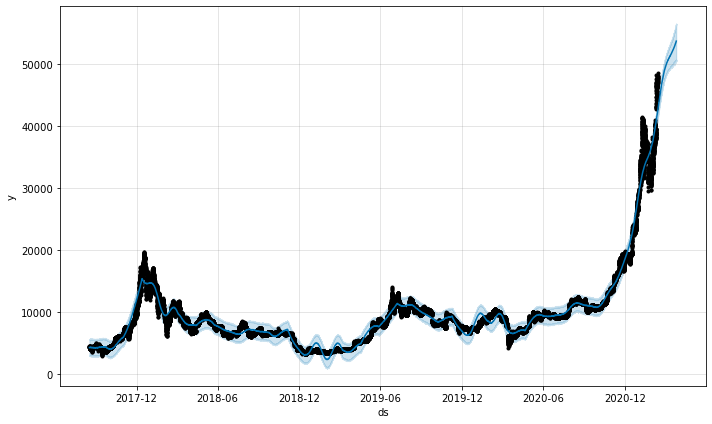

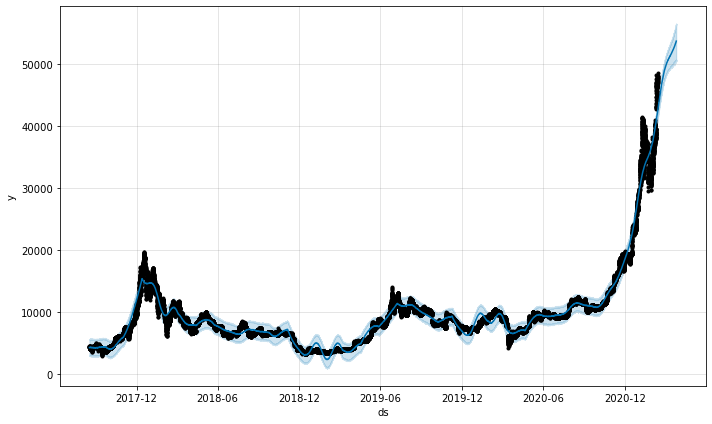

In [17]:
# Plot the Prophet predictions for the Mercado trends data
model.plot(forecast_trends)

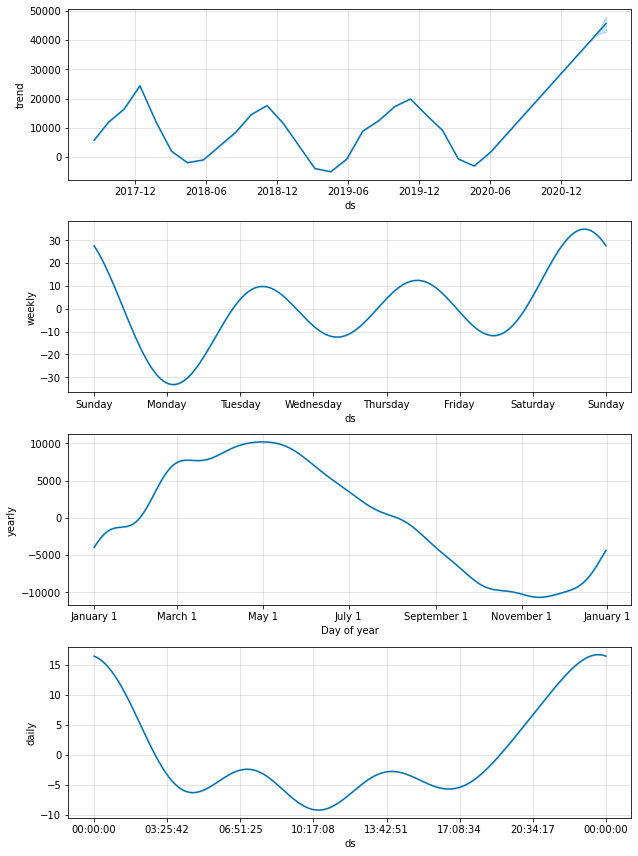

In [18]:
# Use the plot_components function to visualize the forecast results 
figures = model.plot_components(forecast_trends)

### Analyzing Forecasts

In [19]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(['ds'])
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2017-08-17 05:00:00,5698.557052,2964.889788,5503.711008,5698.557052,5698.557052,-1470.769293,-1470.769293,-1470.769293,-6.054894,-6.054894,...,10.188423,10.188423,10.188423,-1474.902821,-1474.902821,-1474.902821,0.0,0.0,0.0,4227.787760
2017-08-17 06:00:00,5705.580986,2852.517538,5452.134369,5705.580986,5705.580986,-1474.510549,-1474.510549,-1474.510549,-4.026701,-4.026701,...,10.963861,10.963861,10.963861,-1481.447708,-1481.447708,-1481.447708,0.0,0.0,0.0,4231.070437
2017-08-17 07:00:00,5712.604919,2946.938540,5499.176122,5712.604919,5712.604919,-1478.842577,-1478.842577,-1478.842577,-2.423386,-2.423386,...,11.582354,11.582354,11.582354,-1488.001545,-1488.001545,-1488.001545,0.0,0.0,0.0,4233.762342
2017-08-17 08:00:00,5719.628852,2883.173560,5517.616632,5719.628852,5719.628852,-1485.859602,-1485.859602,-1485.859602,-3.330016,-3.330016,...,12.034700,12.034700,12.034700,-1494.564286,-1494.564286,-1494.564286,0.0,0.0,0.0,4233.769251
2017-08-17 09:00:00,5726.652786,2937.177974,5560.900227,5726.652786,5726.652786,-1495.080815,-1495.080815,-1495.080815,-6.258959,-6.258959,...,12.314031,12.314031,12.314031,-1501.135887,-1501.135887,-1501.135887,0.0,0.0,0.0,4231.571970


### Testing Upper and Lower ranges of a Forecast 
* `yhat` represents the most likely (average) forecast
* `yhat_lower` and `yhat_upper` represents the worst and best case prediction 
    * (These are based on what are known as 80% confidence intervals).

In [20]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-240:, :].hvplot()

:NdOverlay   [Variable]
   :Curve   [ds]   (value)

### Narrowing a Forecast to a Specific Date Range

In [21]:
# Produce a forecast for a specific time window

# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc['2021-03-01':'2021-03-31'][['yhat_upper', 'yhat_lower', 'yhat']]

# Replace the column names to something less technical sounding
forecast_march_2021 = forecast_march_2021.rename(
    columns={
        'yhat_upper': 'Best Case',
        'yhat_lower':'Worst Case', 
        'yhat':'Most Likely Case'
    }
)

# Review the last five rows of the DataFrame
forecast_march_2021.tail()

,Best Case,Worst Case,Most Likely Case
ds,,,
2021-03-25 17:00:00,56350.351268,50614.759717,53597.587275
2021-03-25 18:00:00,56446.343301,50611.786084,53607.439404
2021-03-25 19:00:00,56249.443677,50360.164336,53618.845875
2021-03-25 20:00:00,56458.857327,50593.014613,53630.913963
2021-03-25 21:00:00,56352.279744,50456.965194,53643.109414


In [22]:
# Display the average forecasted price for March 2021
forecast_march_2021.mean()

Best Case           53459.202143
Worst Case          49374.576585
Most Likely Case    51478.260110
dtype: float64

# Advanced Forecasting Methods in Facebook Prophet



### Detecting Abrupt Changes in Trend
**Changes points** are point of time when the time series abruptly change in their trajectories. Prophet can automatically detect these change points.

In [23]:
# We still have our saved model from above:
model

In [24]:
# We also have the saved forecasts from that model:
forecast_trends.tail(3)

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,,,,
2021-03-25 19:00:00,45576.707629,50360.164336,56249.443677,42664.257192,48054.538914,8042.138245,8042.138245,8042.138245,-0.125672,-0.125672,...,5.864526,5.864526,5.864526,8036.399391,8036.399391,8036.399391,0.0,0.0,0.0,53618.845875
2021-03-25 20:00:00,45582.876950,50593.014613,56458.857327,42664.885047,48064.592844,8048.037013,8048.037013,8048.037013,4.141855,4.141855,...,4.495980,4.495980,4.495980,8039.399178,8039.399178,8039.399178,0.0,0.0,0.0,53630.913963
2021-03-25 21:00:00,45589.046270,50456.965194,56352.279744,42665.512901,48074.646773,8054.063144,8054.063144,8054.063144,8.593136,8.593136,...,3.059999,3.059999,3.059999,8042.410009,8042.410009,8042.410009,0.0,0.0,0.0,53643.109414


In [25]:
# import plot change point function
from fbprophet.plot import add_changepoints_to_plot

In [26]:
# Reset the index of this forecast dataframe in order to use changepoints:
forecast_trends = forecast_trends.reset_index()

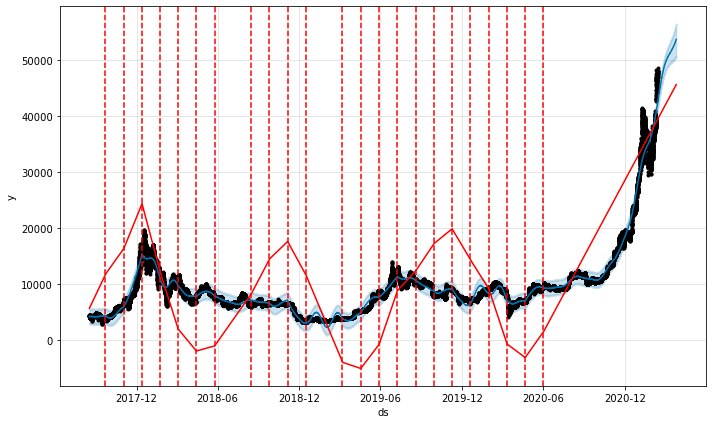

In [27]:
# plot forecast as usual
fig = model.plot(forecast_trends)

# add change points to plot; by default changepoints are only inferred for the first 80% of data to avoid overfitting,
# but this can be changed by using the changepoint_range argument of the model
a = add_changepoints_to_plot(fig.gca(), model, forecast_trends)

In [28]:
# print datetime of detected changepoints 
display(model.changepoints)

984     2017-09-22 05:00:00
1968    2017-11-02 05:00:00
2952    2017-12-13 05:00:00
3936    2018-01-23 05:00:00
4919    2018-03-04 00:00:00
5903    2018-04-14 00:00:00
6887    2018-05-25 00:00:00
7871    2018-07-05 07:00:00
8855    2018-08-15 00:00:00
9839    2018-09-25 00:00:00
10823   2018-11-05 00:00:00
11807   2018-12-16 00:00:00
12790   2019-01-25 23:00:00
13774   2019-03-07 23:00:00
14758   2019-04-17 23:00:00
15742   2019-05-28 23:00:00
16726   2019-07-08 23:00:00
17710   2019-08-18 23:00:00
18694   2019-09-28 23:00:00
19678   2019-11-08 23:00:00
20661   2019-12-19 22:00:00
21645   2020-01-29 22:00:00
22629   2020-03-10 22:00:00
23613   2020-04-20 22:00:00
24597   2020-05-31 22:00:00
Name: ds, dtype: datetime64[ns]

# This is Where The New Code Begins

### Modeling holiday effects in the Prophet model

To model the impact of holidays or other recurring events, you can use the Prophet's holiday function. In this exercise, we will use Prophet's built-in collection of country-specific holidays, and model how they impact the price of bitcoin.

In [30]:
# Create a new Prophet model
model_holiday = Prophet()

# Add the built-in US holidays to the model
model_holiday.add_country_holidays('US')

# Fit model
model_holiday.fit(df)

Initial log joint probability = -2525.12
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       77806.3      0.091153        120881      0.7074      0.7074      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       87573.3     0.0164378       7582.97           1           1      242   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       90412.6     0.0637309       27597.7           1           1      350   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       93087.2     0.0115871       31883.6           1           1      459   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       94522.7     0.0366287       23997.1           1           1      566   
    Iter      log prob        ||dx||      ||grad||       alpha  

|dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1199        100093     0.0188133       5291.22           1           1     1348   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1299        100198    0.00274262       8337.41      0.8198      0.8198     1460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1399        100331    0.00383435       4920.87           1           1     1573   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1499        100473     0.0156237        4585.1           1           1     1686   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1599        100595   0.000425367       5258.37      0.6722      0.6722     1800   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1699        100651    0.00373228        

In [31]:
# Check what holidays are included
model_holiday.train_holiday_names

0                                      New Year's Day
1                           New Year's Day (Observed)
2                          Martin Luther King Jr. Day
3                               Washington's Birthday
4                                        Memorial Day
5                                    Independence Day
6                                           Labor Day
7                                        Columbus Day
8                                        Veterans Day
9                             Veterans Day (Observed)
10                                       Thanksgiving
11                                      Christmas Day
12                        Independence Day (Observed)
13               Juneteenth National Independence Day
14    Juneteenth National Independence Day (Observed)
15                           Christmas Day (Observed)
dtype: object

In [33]:
# Create a dataframe to hold predictions as far as 1000 hours (approx 40 days),
# using `make_future_dataframe`.
future_trends = model_holiday.make_future_dataframe(periods=1000, freq="H")
future_trends.tail()

,ds
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00
31486,2021-03-25 21:00:00


In [26]:
# Make the predictions for the trend data using the future_trends DataFrame
# YOUR CODE HERE!

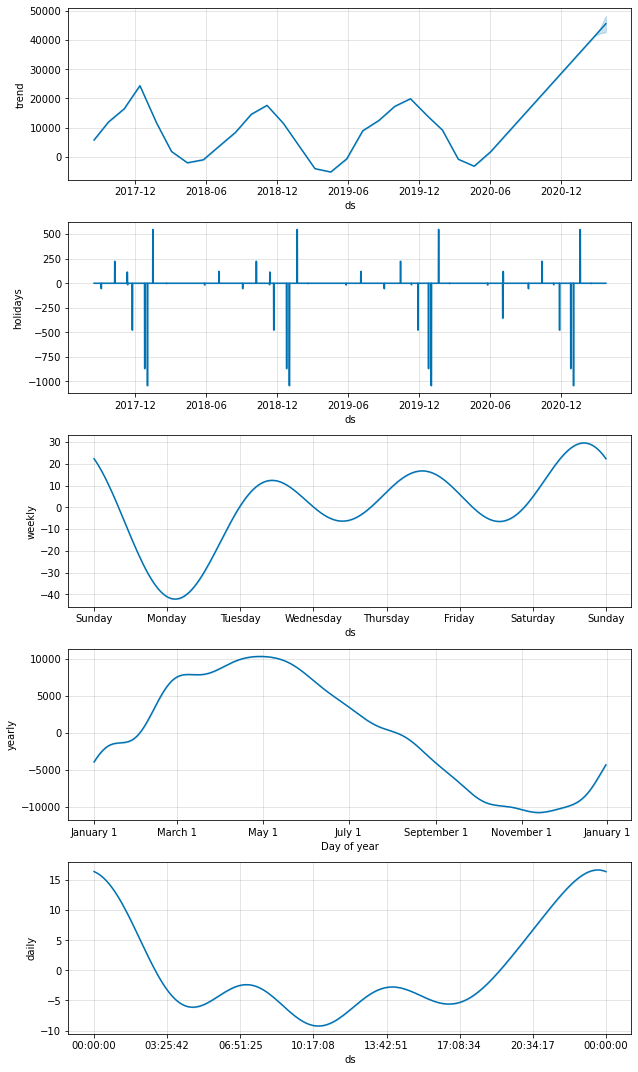

In [27]:
# Plot trend components - in addition to the weekly/yearly/daily trend, there's now also a plot for holiday effects
# YOUR CODE HERE!